In [1]:
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.pyplot import figure
from dateutil.parser import parse
from collections import OrderedDict

In [3]:
# Path Variables 

# covid_confirmed reads in covid_confirmed_usafacts.csv
covid_confirmed = pd.read_csv('C:/Users/ryanh/OneDrive - San Diego State University (SDSU.EDU)/SDSU Graduate Course Notes/649 - Big Data/Assignments/Assignment 1/assignment1data/covid_confirmed_usafacts.csv')
# covid_deaths reads in covid_deaths_usafacts.csv
covid_deaths = pd.read_csv('C:/Users/ryanh/OneDrive - San Diego State University (SDSU.EDU)/SDSU Graduate Course Notes/649 - Big Data/Assignments/Assignment 1/assignment1data/covid_deaths_usafacts.csv')
# covid_county_population reads in covid_county_population_usafacts.csv
covid_county_population = pd.read_csv('C:/Users/ryanh/OneDrive - San Diego State University (SDSU.EDU)/SDSU Graduate Course Notes/649 - Big Data/Assignments/Assignment 1/assignment1data/covid_county_population_usafacts.csv')

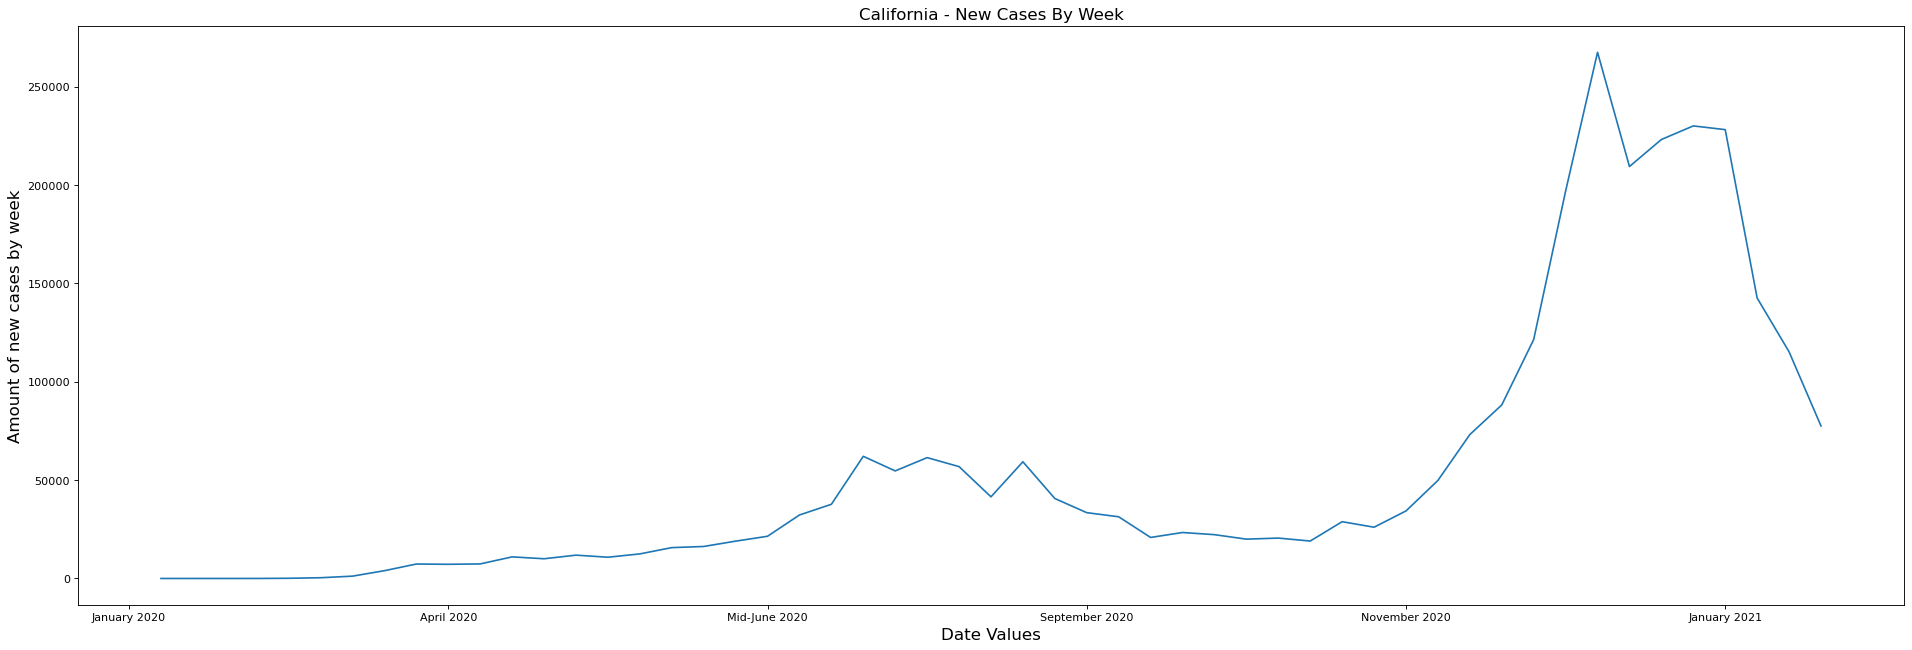

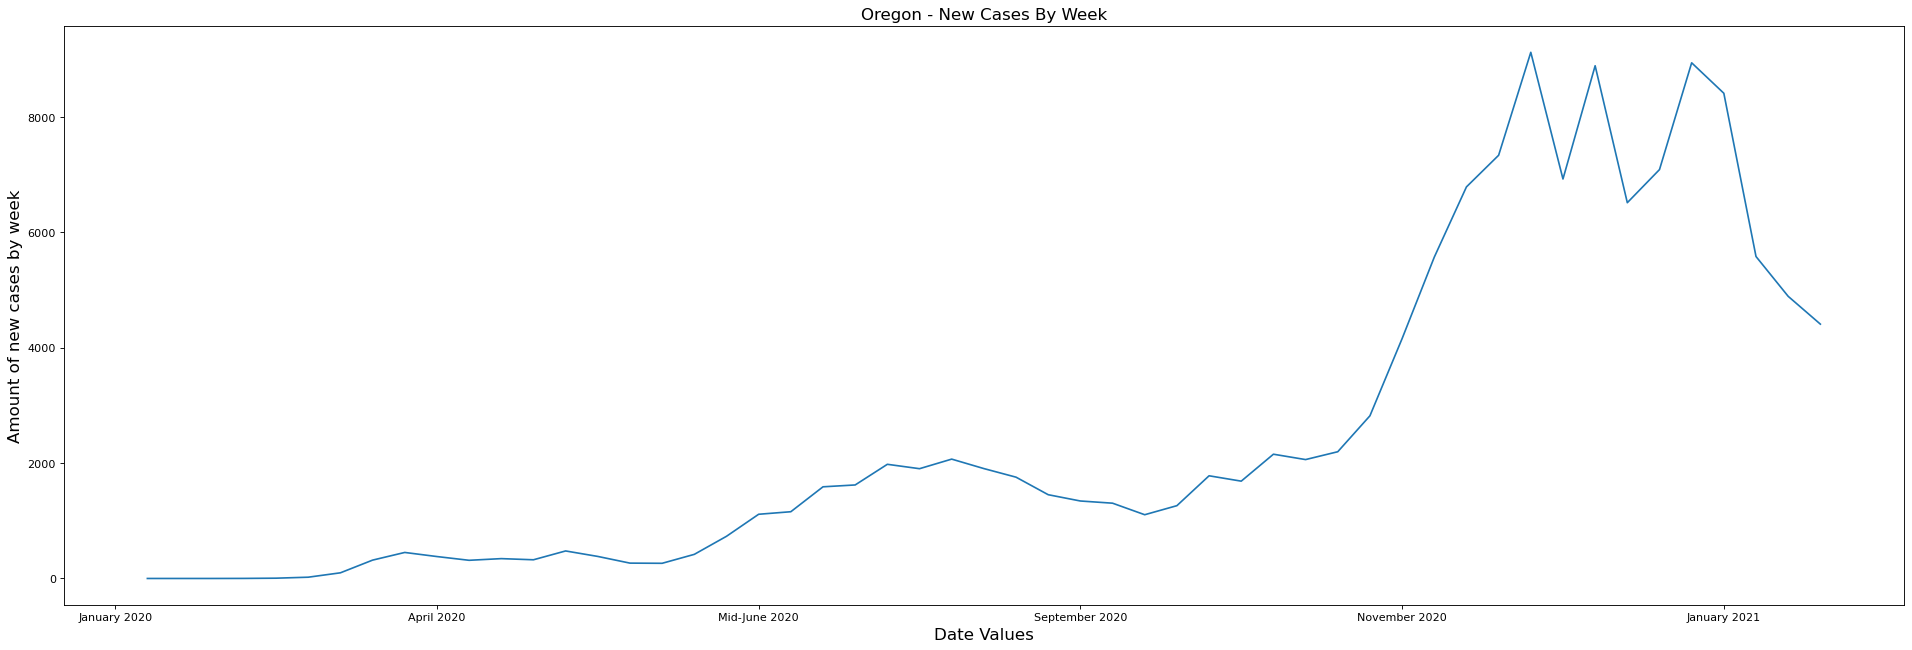

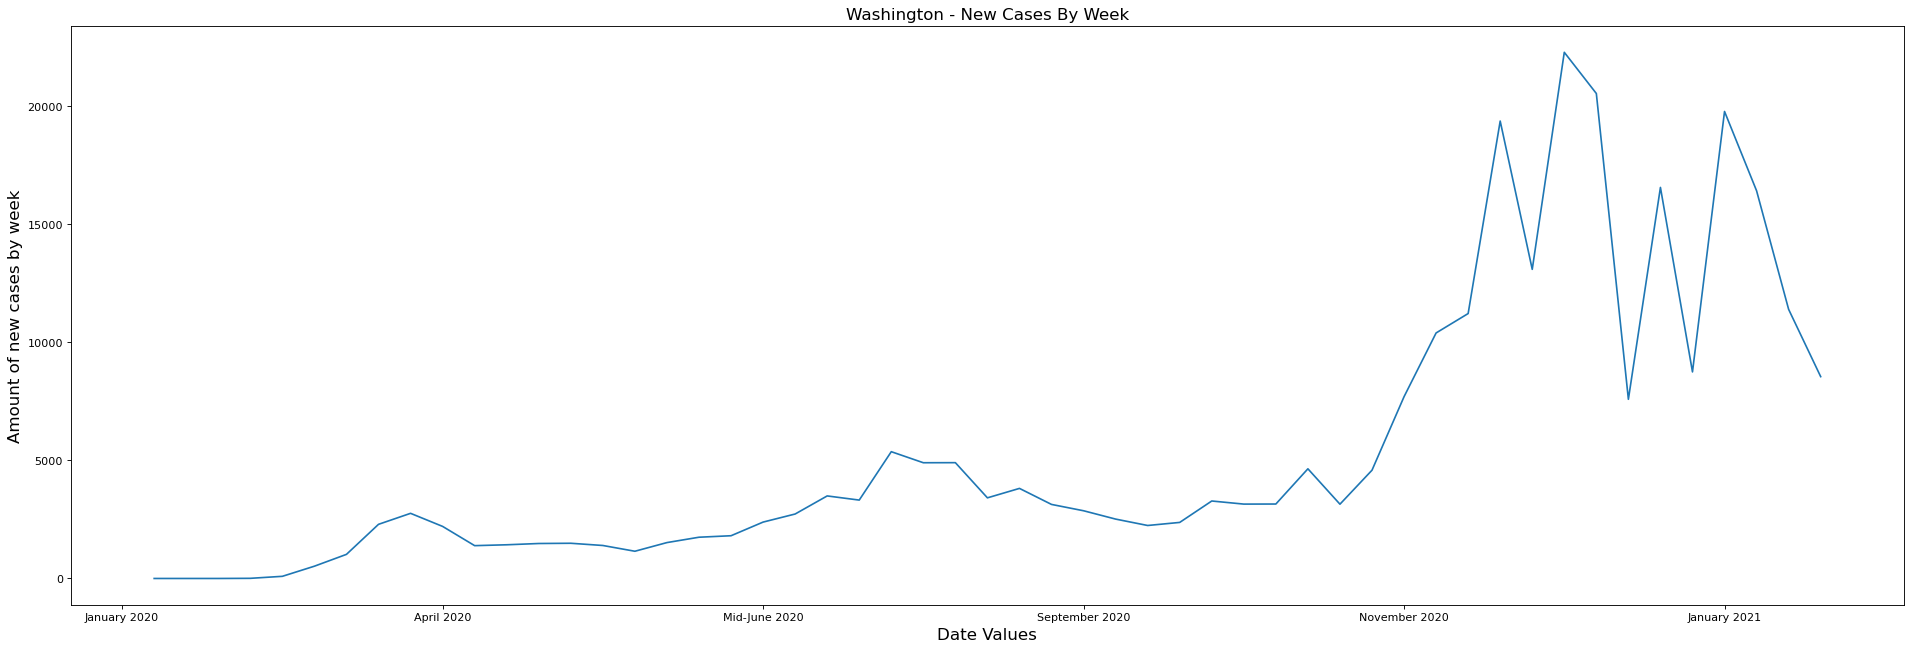

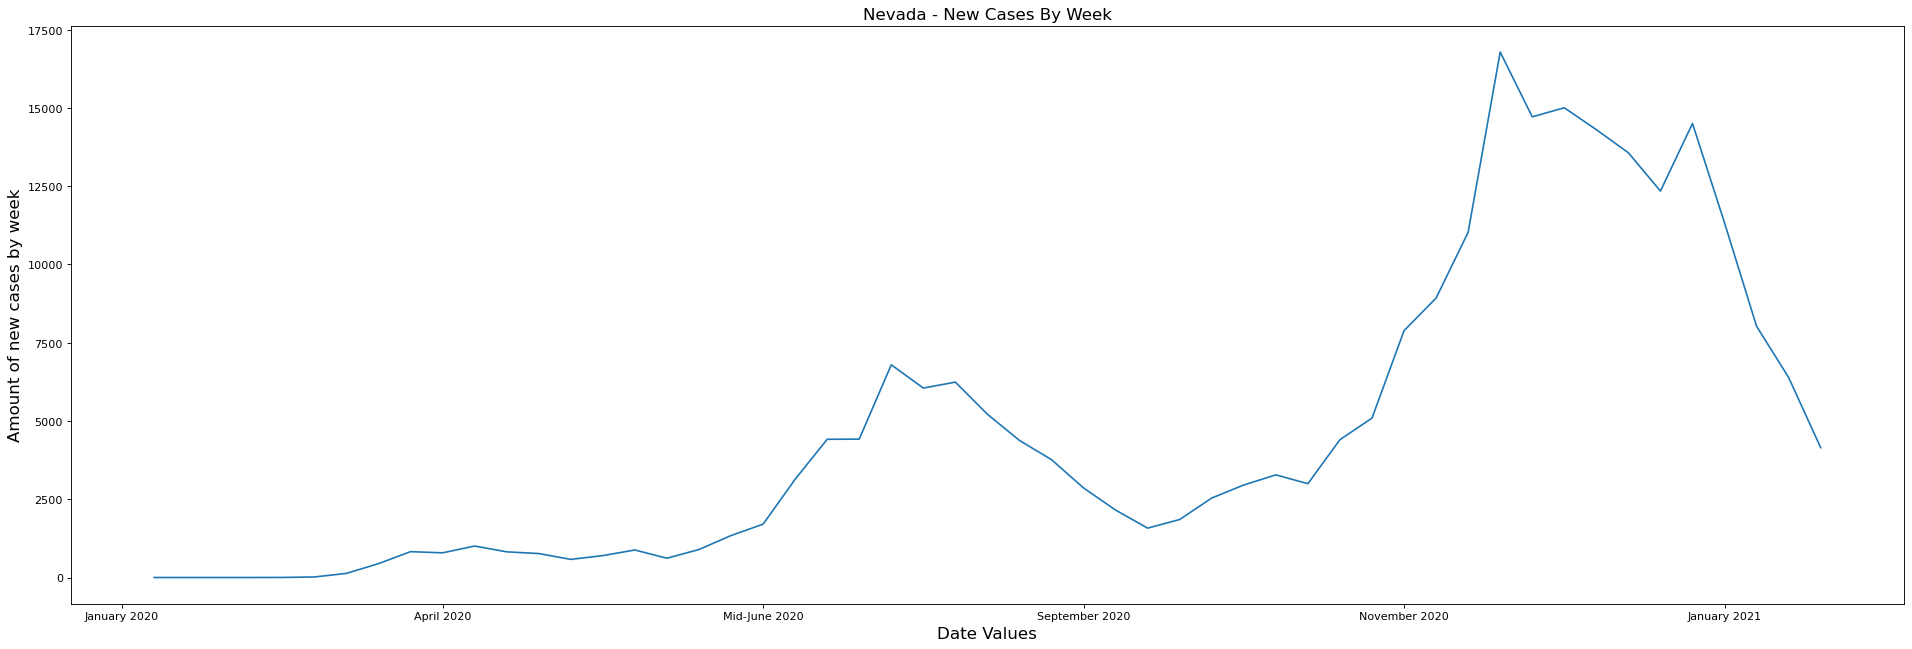

In [4]:
# 1.) Plot the weekly number of new cases of covid in the following states: California, Oregon, Washington, and Nevada. A week starts on Monday and ends on Sunday.

def create_state_data(state, data_type):
    """
    This function takes in a string that represents the state we would like to create Datafrrame variables for. It also takes another string that is used to determine if we are using the case data or the death data.
    This is down by extracting the data based on the state then filtered out unneeded values. Finally, we take different values based on their needs

    :param state: 'CA' or 'OR' or 'WA' or 'NV'
    :param data_type: another string that specifies which dataset we are calling
    """
    if data_type == 'cases':
        data = covid_confirmed.loc[covid_confirmed['State'] == state]
    elif data_type == 'deaths':
        data = covid_deaths.loc[covid_deaths['State'] == state]
    data_filter = data.drop(columns = ['StateFIPS','2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25','2020-01-26'])
    data_filter_sum = data_filter.sum()
    data_filter_diff = data_filter_sum.iloc[3:].diff()
    data_filter_diff_df = data_filter_diff.to_frame()
    data_transposed = data_filter_diff_df.T
    return data_filter, data_filter_sum, data_filter_diff, data_filter_diff_df, data_transposed


california_data_filter_cases, california_filter_sum_cases, california_data_filter_diff_cases, california_data_filter_diff_df_cases, california_data_transposed_cases = create_state_data('CA', 'cases')
oregon_data_filter_cases, oregon_data_filter_sum_cases, oregon_data_filter_diff_cases, oregon_data_filter_diff_df_cases, oregon_data_transposed_cases = create_state_data('OR', 'cases')
washington_data_filter_cases, washington_data_filter_sum_cases, washington_data_filter_diff_cases, washington_data_filter_diff_df_cases, washington_data_transposed_cases = create_state_data('WA', 'cases')
nevada_data_filter_cases, nevada_data_filter_sum_cases, nevada_data_filter_diff_cases, nevada_data_filter_diff_df_cases, nevada_data_transposed_cases = create_state_data('NV', 'cases')

# int value to iterate through the weeks in compute_values_for_state_cases
week_end_cases = len(oregon_data_transposed_cases.columns)

# Lists of values by state for graph axes 
start_date_range = 0
california_dates_cases, california_weeks_cases, oregon_dates_cases, oregon_weeks_cases, washington_dates_cases, washington_weeks_cases, nevada_dates_cases, nevada_weeks_cases = ([] for i in range(8))

def data_column_index(state, value):
    """
    This function takes in a string and and a index to return the respective column of a dataframe
    
    :param state: 'CA' or 'OR' or 'WA' or 'NV'
    :param value: index value 
    """ 
    return state.columns[value]


def compute_values_for_state(state_date_range, state_week_range, state_data, state_end_date, state, graph_type):
    """
    This function takes in Pandas DataFrame objects that we created in the function, create_state_data_for_cases
    
    :param state_date_range: list
    :param state_week_range: list
    :param state_data: DataFrame
    :param state_end_date: int
    :param state: String
    """ 
    total_sum = 0
    for i in range(start_date_range, state_end_date):
        current_date = data_column_index(state_data, i)

        check_value = pd.to_datetime(current_date, format='%Y-%m-%d')
        date = check_value.day_name()
        
        if check_value.day_name() == 'Monday':
            week_start = current_date
        if date == 'Monday' or (date!= 'Monday' and date != 'Sunday'):
            total_sum = total_sum + state_data[current_date].item()
        if check_value.day_name() == 'Sunday':  
            state_date_range.append(total_sum)
            state_week_range.append(week_start)
            total_sum = 0
    plot_case_values(state_week_range, state_date_range, state, graph_type) 

    
def plot_case_values(state_week_range, state_date_range, state, graph_type):
    """
    This function takes in two lists and a string value to plot values.
    
    :param state_week_range: list
    :param state_date_range: list
    :param state: String
    """ 
    plt.figure(num=None, figsize=(24, 8), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(state_week_range, state_date_range)
    plt.xlabel('Date Values', fontsize = 15)
    if graph_type == 'C':
        plt.ylabel('Amount of new cases by week', fontsize = 15)
    else:
        plt.ylabel('Amount of new deaths by week', fontsize = 15)
    plt.xticks(np.arange(0, 53, step=10), ['January 2020', 'April 2020', 'Mid-June 2020', 'September 2020', 'November 2020', 'January 2021'])
    plt.tight_layout()

    if state == 'CA':
        if graph_type == 'C':
            plt.title("California - New Cases By Week", fontsize = 15)
        else:
            plt.title("California - New Deaths By Week", fontsize = 15)
    elif state == 'OR':
        if graph_type == 'C':
            plt.title("Oregon - New Cases By Week", fontsize = 15)
        else:
            plt.title("Oregon - New Deaths By Week", fontsize = 15)
    elif state == 'WA':
        if graph_type == 'C':
            plt.title("Washington - New Cases By Week", fontsize = 15)
        else:
            plt.title("Washington - New Deaths By Week", fontsize = 15)
    elif state == 'NV':
        if graph_type == 'C':
            plt.title("Nevada - New Cases By Week", fontsize = 15)
        else:
            plt.title("Nevada - New Deaths By Week", fontsize = 15) 
    plt.show()


compute_values_for_state(california_dates_cases, california_weeks_cases, california_data_transposed_cases, week_end_cases, 'CA', 'C')
compute_values_for_state(oregon_dates_cases, oregon_weeks_cases, oregon_data_transposed_cases, week_end_cases, 'OR', 'C')
compute_values_for_state(washington_dates_cases, washington_weeks_cases, washington_data_transposed_cases, week_end_cases, 'WA', 'C')
compute_values_for_state(nevada_dates_cases, nevada_weeks_cases, nevada_data_transposed_cases, week_end_cases, 'NV', 'C')

2.) Do these states follow the same trends?

The data graphs all look very similar prior to the holiday season. Leading up into the holidays, all 4 states see a sharp rise in cases. One interesting thing to note is the rapid spikes in Oregon and Washington coming into December of 2020. While Nevada and California follow a similar trend during this period, Oregon and Washington have a lot more variance. It could be due to lack of testing during the holidays. Additionally, all the states see a small uptick following the 4th of July. This uptick is most notable in Nevada and Washington. However, there are some strong differences between the graphs. The most noticeable is the scale of the Y axis.

For example, the graph below shows that while these graphs may look similar, the scale of California is much larger than the other 3 states. In fact, California ranges from 10 to 23 times the amount of cases compared to the other states listed above.

In [13]:
def CompareGraphs(x, y1, y2, y3, y4, graph_type):
    """
    This function takes in a week range and the date ranges of 4 different states to plot all of lines on one graph.
    
    :param x:  list
    :param y1: list
    :param y2: list
    :param y3: list
    :param y4: list
    :param graph_type: string that reads 'cases' or 'deaths'
    """ 
    plt.figure(num=None, figsize=(24, 8), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(x, y1, label= 'California')
    plt.plot(x, y2, label= 'Oregon')
    plt.plot(x, y3, label= 'Washington')
    plt.plot(x, y4, label= 'Nevada')
    plt.xlabel('Date Values', fontsize = 15)
    plt.legend(['California', 'Oregon', 'Washington', 'Nevada'], loc='upper left')
    plt.xticks(np.arange(0, 53, step=10), ['January 2020', 'April 2020', 'Mid-June 2020', 'September 2020', 'November 2020', 'January 2021'])
    if graph_type == 'cases':
        plt.ylabel('Amount of new cases by week', fontsize = 15)
        plt.title('Overview of Cases for the 4 States', fontsize = 15)
    elif graph_type == 'deaths':
        plt.ylabel('Amount of new deaths by week', fontsize = 15)
        plt.title('Overview of Deaths for the 4 States', fontsize = 15)
    plt.tight_layout()

CompareGraphs(california_weeks_cases, california_dates_cases, oregon_dates_cases, washington_dates_cases, nevada_dates_cases, 'cases')

<class 'list'>


NameError: name 'y' is not defined

<Figure size 1920x640 with 0 Axes>

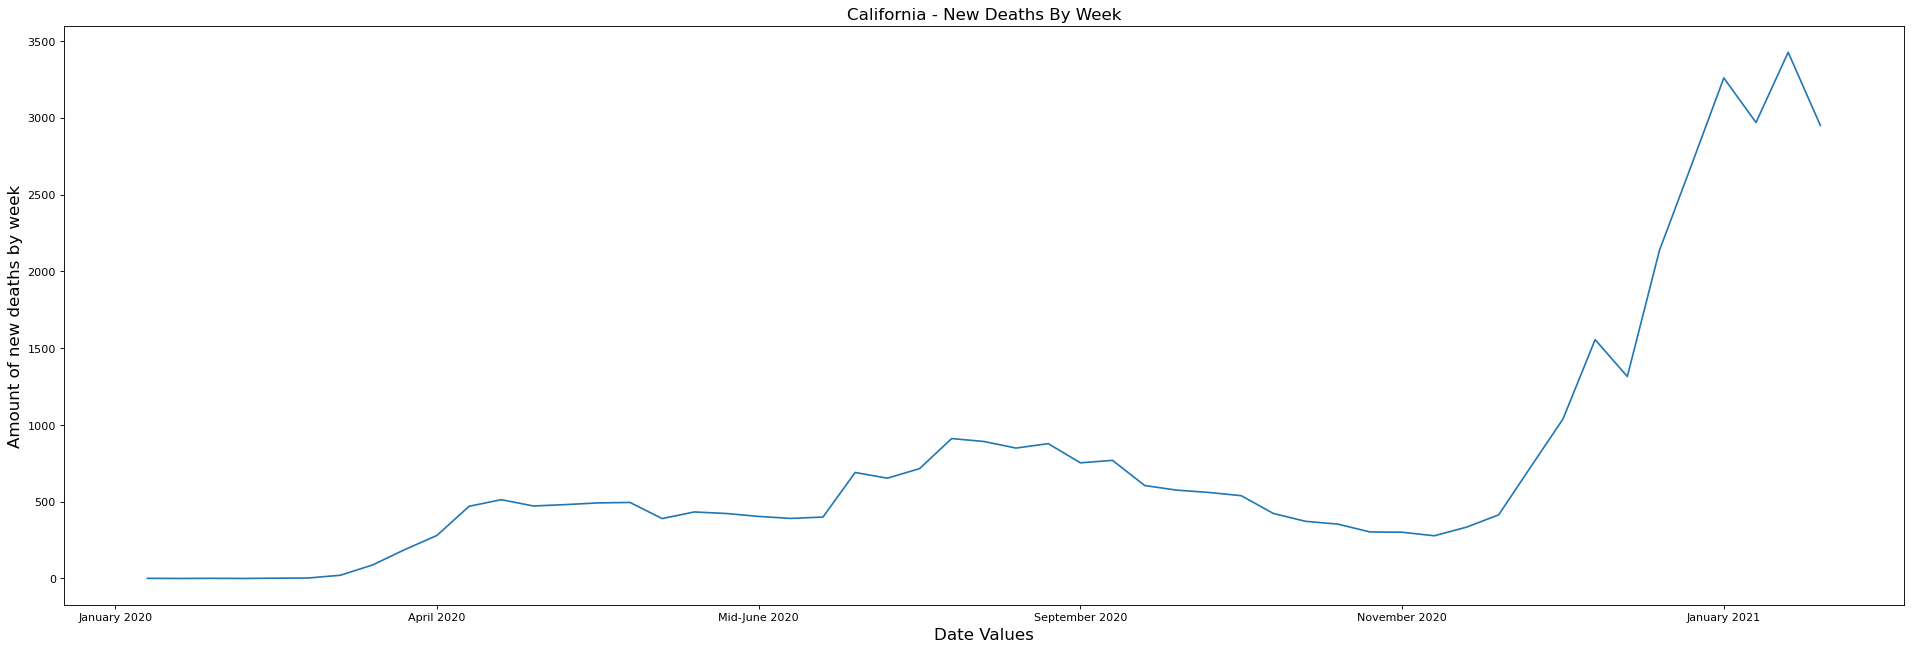

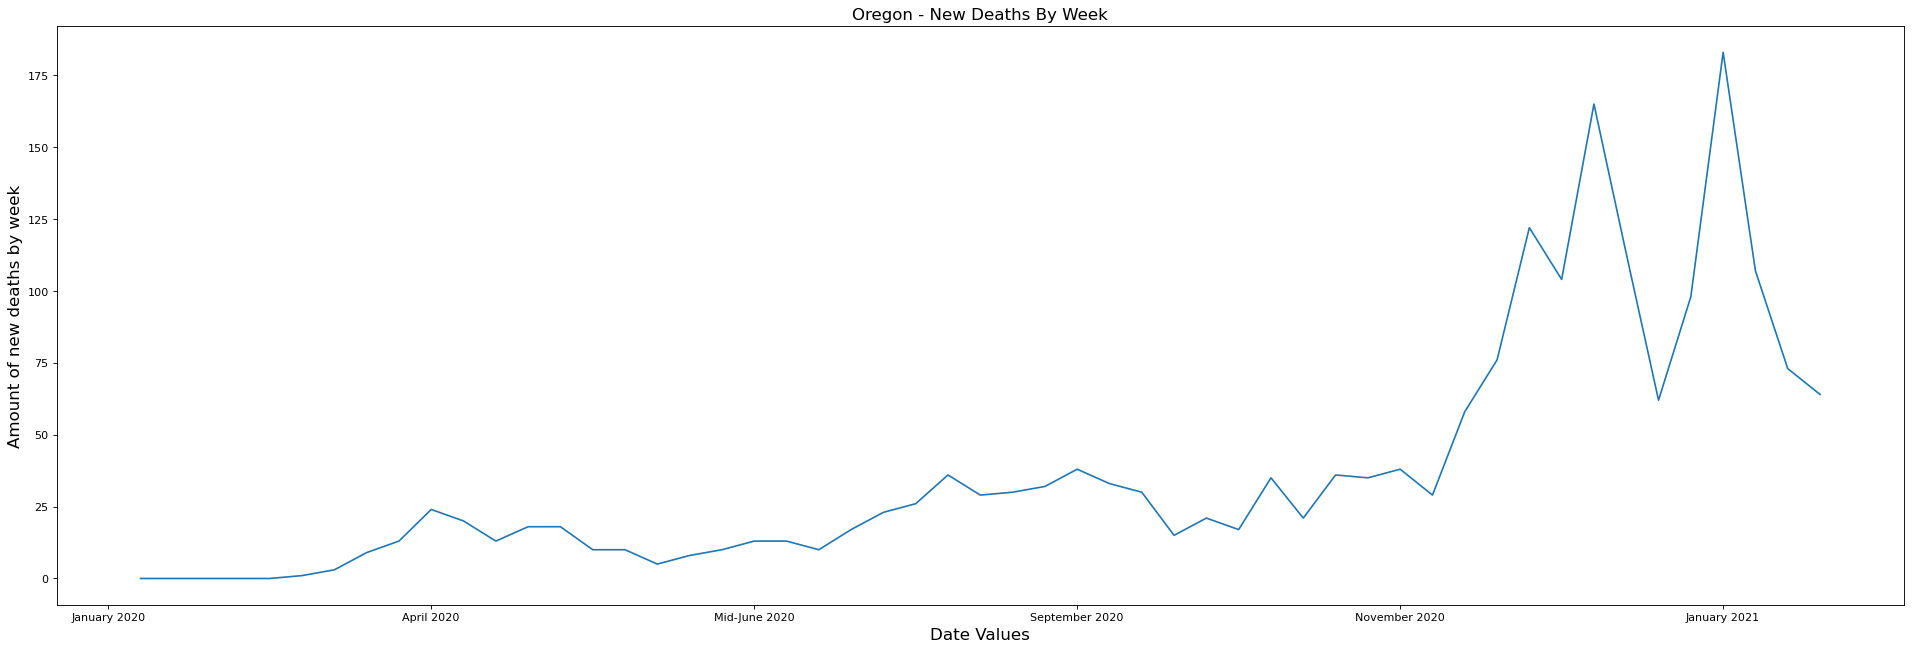

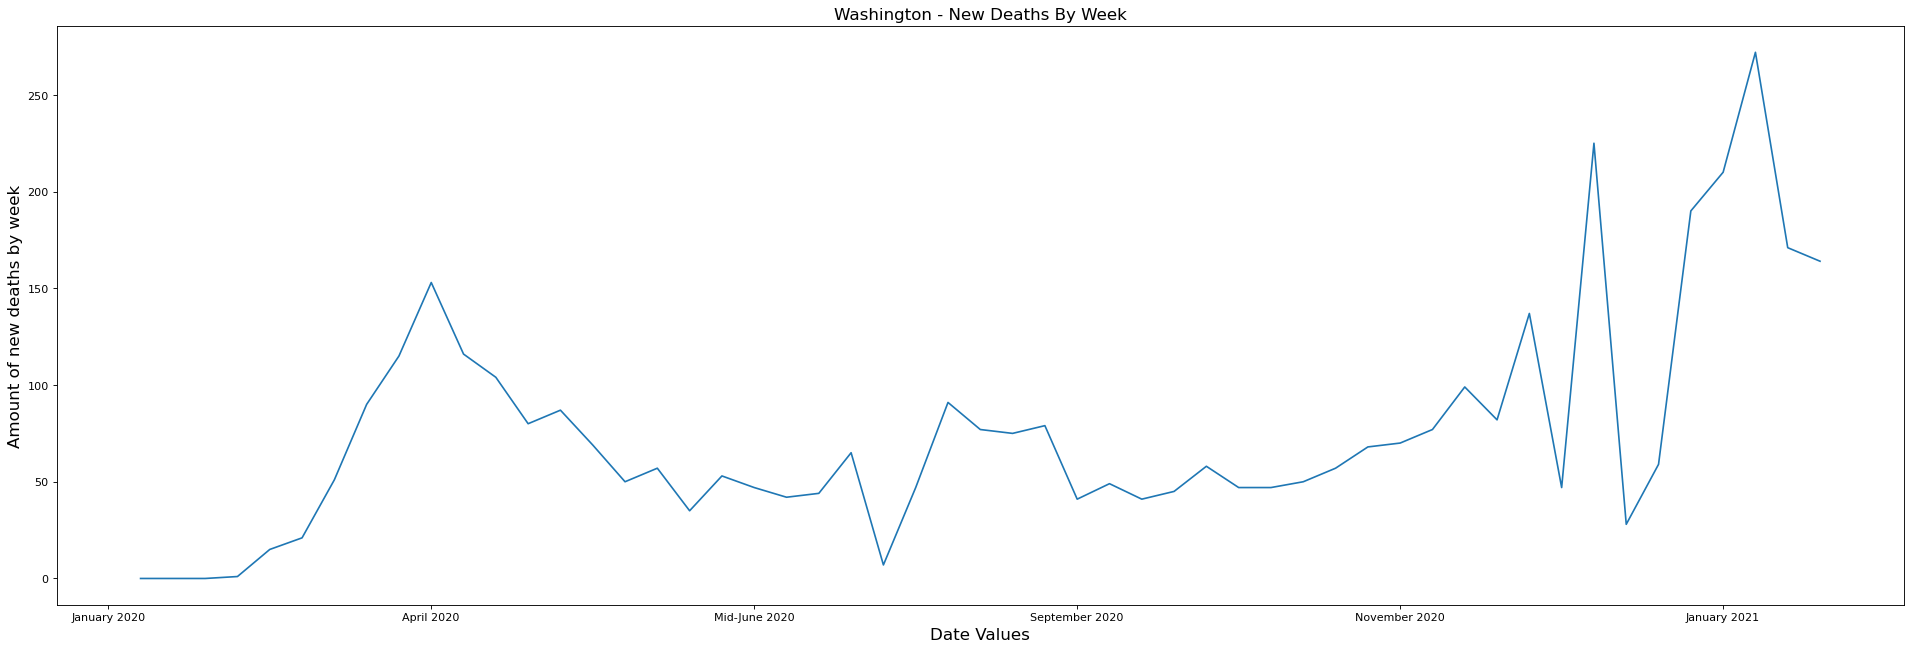

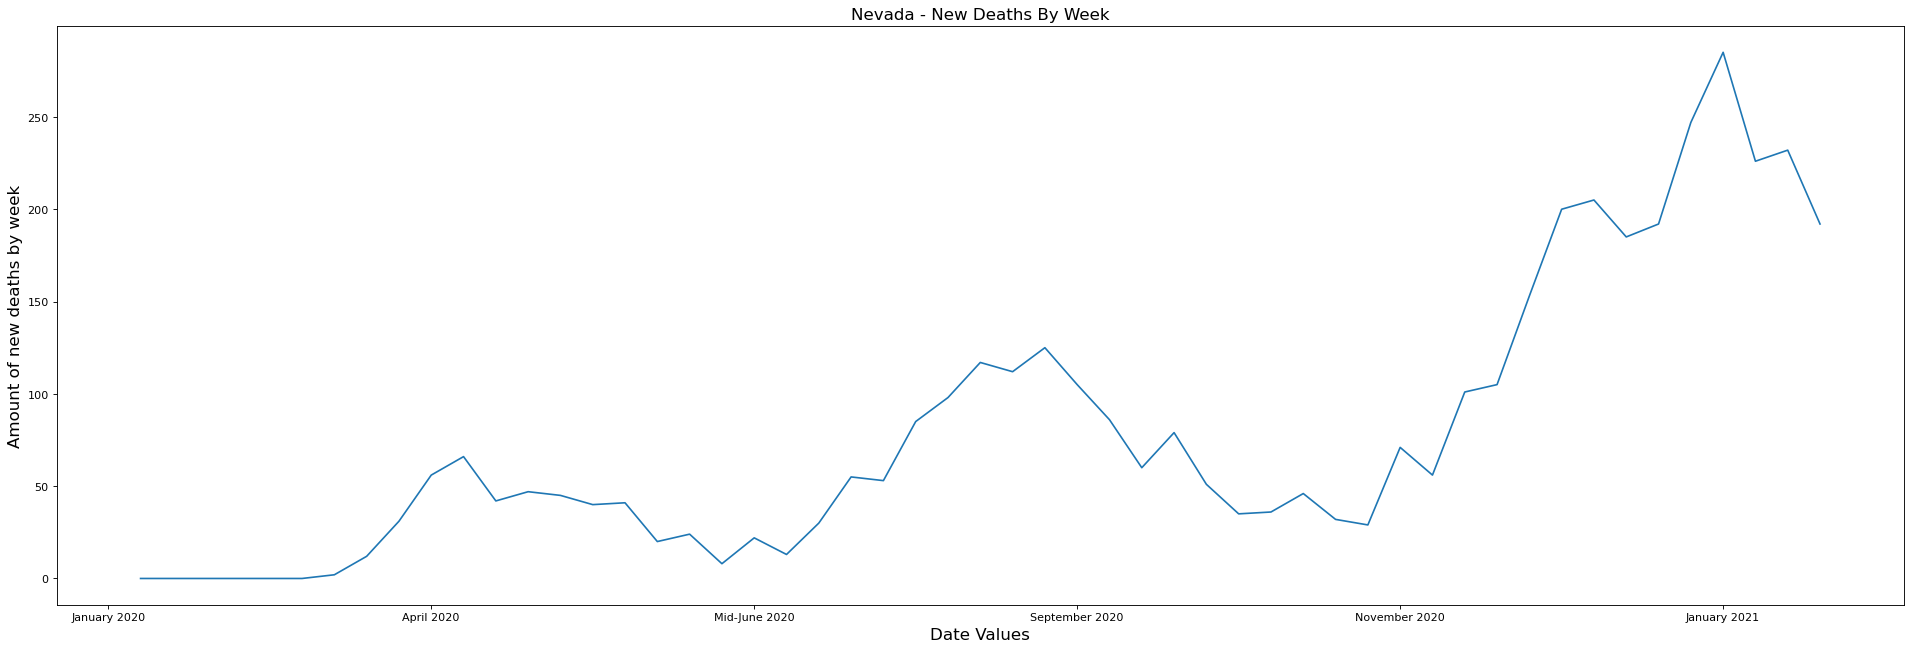

In [6]:
# 3.) Plot the weekly number of covid deaths in the following states: California, Oregon, Washington, and Nevada. A week starts on Monday and ends on Sunday.

# california_dates, california_weeks, oregon_dates, oregon_weeks, washington_dates, washington_weeks, nevada_dates, nevada_weeks = ([] for i in range(8))

california_data_filter_deaths, california_filter_sum_deaths, california_data_filter_diff_deaths, california_data_filter_diff_df_deaths, california_data_transposed_deaths = create_state_data('CA', 'deaths')
oregon_data_filter_deaths, oregon_data_filter_sum_deaths, oregon_data_filter_diff_deaths, oregon_data_filter_diff_df_deaths, oregon_data_transposed_deaths = create_state_data('OR', 'deaths')
washington_data_filter_deaths, washington_data_filter_sum_deaths, washington_data_filter_diff_deaths, washington_data_filter_diff_df_deaths, washington_data_transposed_deaths = create_state_data('WA', 'deaths')
nevada_data_filter_deaths, nevada_data_filter_sum_deaths, nevada_data_filter_diff_deaths, nevada_data_filter_diff_df_deaths, nevada_data_transposed_deaths = create_state_data('NV', 'deaths')

week_end_deaths = len(oregon_data_transposed_deaths.columns)
california_dates_deaths, california_weeks_deaths, oregon_dates_deaths, oregon_weeks_deaths, washington_dates_deaths, washington_weeks_deaths, nevada_dates_deaths, nevada_weeks_deaths = ([] for i in range(8))

compute_values_for_state(california_dates_deaths, california_weeks_deaths, california_data_transposed_deaths, week_end_deaths, 'CA', 'D')
compute_values_for_state(oregon_dates_deaths, oregon_weeks_deaths, oregon_data_transposed_deaths, week_end_deaths, 'OR', 'D')
compute_values_for_state(washington_dates_deaths, washington_weeks_deaths, washington_data_transposed_deaths, week_end_deaths, 'WA', 'D')
compute_values_for_state(nevada_dates_deaths, nevada_weeks_deaths, nevada_data_transposed_deaths, week_end_deaths, 'NV', 'D')

4.) How do the deaths and new cases compare?

The correlation between new cases and deaths is somewhat similar. 
The death rate in each state is more volatile compared to the weekly new cases. However, the range of deaths is much closer together for Oregon, Washington, and Nevada which all stay within a range of less than 250 per week.
One clear commonality between new cases and deaths is the large amount of variation in both graphs for the states of Washington and Oregon around Christmas. This again reinforces the reporting in these states during these periods may have been affected by the holidays and people taking time off. We also notice a quick drop in reports for Washington around the 4th of July. Lastly, all states see a sharp spike in new deaths during the new year. This may to the large increases of cases that are reported during the prior weeks and the lack of care available in hospitals during these peak times.

Again, we stress the importance of the scale of these 4 graphs. As you can see below, the ranges for deaths are much closer than cases but it is clear that California still dominates the graph in overall deaths by week.

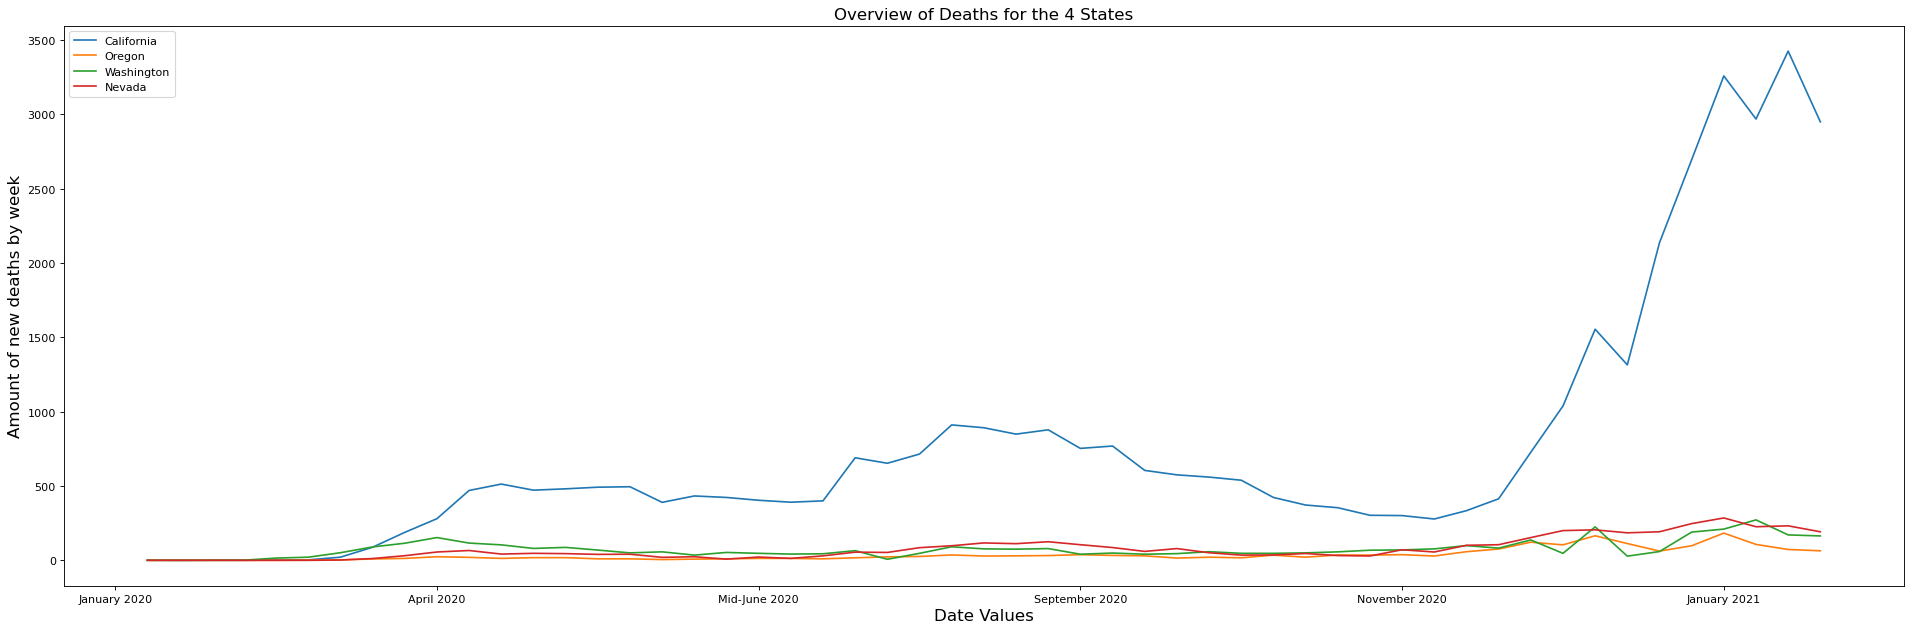

In [7]:
CompareGraphs(california_weeks_deaths, california_dates_deaths, oregon_dates_deaths, washington_dates_deaths, nevada_dates_deaths, 'deaths')

In [8]:
# 5.) Compute the number of new covid cases per 100,000 population in each county per week. Show the 20 highest rates achieved. Include their date, county name, and rate

combine_covid_cases = pd.merge(covid_confirmed, covid_county_population, left_on='countyFIPS', right_on='countyFIPS')
combine_covid_cases_filter = combine_covid_cases.drop(columns = ['StateFIPS','2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25','2020-01-26'])
covid_cases_by_county = combine_covid_cases_filter.groupby(['State_x', 'County Name_x', 'population','countyFIPS']).sum()
new_covid_cases_by_county = covid_cases_by_county.diff(axis = 1)
pd.set_option('mode.use_inf_as_na', True)

def convert_to_week(DataFrame):
    """
    This function maps the new cases to a weekly date value to be used in the creation of a filtered DataFrame that is partitioned by state then county.
    
    :param state_new_cases: DataFrame
    """
    new_cases = 0
    weekly_counts = []
    
    for key, value in DataFrame.items():
        key_date = pd.to_datetime(key, format='%Y-%m-%d', exact = False)
        key_day = key_date.day_name()
        new_cases += value
        if key_day == 'Sunday':
            weekly_counts.append(new_cases)
            new_cases = 0
    return weekly_counts


new_case_count = pd.DataFrame(convert_to_week(new_covid_cases_by_county)).T

def compute_case_values(new_case_count):
    """
    This function takes in one DataFrame object that we will use to pull the top twenty covid case counties from. 
    These computed values are then outputted in table format
    
    :param new_case_count: DataFrame
    """
    new_case_count = new_case_count.reset_index()
    case_count_dates = new_case_count.loc[:, '2020-01-27':]
    case_count_dates = (case_count_dates * 100000).div(new_case_count.population, axis=0)
    new_case_count.loc[:, '2020-01-27':] = case_count_dates
    new_case_count = new_case_count.set_index(['State_x', 'County Name_x'])
    new_case_count = new_case_count.loc[:, '2020-01-27':].stack().nlargest(20)
    new_case_count = new_case_count.to_frame().reset_index()
    new_case_count.index += 1
    new_case_count = new_case_count.rename(columns={'State_x': 'State', 'County Name_x': 'County Name', 'level_2': 'Week', '0': 'Result'})
    new_case_count = new_case_count.assign(Values=new_case_count.iloc[:,-1]).T
    new_case_count = new_case_count.T
    output = new_case_count[['State', 'County Name', 'Week', 'Values']]
    display(output)
         

compute_case_values(new_case_count)

,State,County Name,Week,Values
1,TN,Trousdale County,2020-04-27,11503.013116
2,FL,Lafayette County,2020-08-10,10009.498931
3,PA,Forest County,2021-01-18,9134.814406
4,TX,Childress County,2020-11-02,8335.614563
5,CO,Crowley County,2020-11-09,7688.500247
6,NV,Pershing County,2020-12-28,7315.985130
7,CO,Lincoln County,2020-11-30,7314.506227
8,TN,Wayne County,2020-08-31,7047.322018
9,TX,Crockett County,2020-12-21,6033.487298
10,AR,Lee County,2020-06-08,5724.285876


In [9]:
### 6.) Compute the number of new covid deaths per 100,000 population in each county per week. Show the 20 highest rates achieved. Include their date, county name, and rate

combine_covid_deaths = pd.merge(covid_deaths, covid_county_population, left_on='countyFIPS', right_on='countyFIPS')
combine_covid_deaths_filter = combine_covid_deaths.drop(columns = ['StateFIPS','2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25','2020-01-26'])
covid_deaths_by_county = combine_covid_deaths_filter.groupby(['State_x', 'County Name_x', 'population','countyFIPS']).sum()
new_covid_deaths_by_county = covid_deaths_by_county.diff(axis = 1)
pd.set_option('mode.use_inf_as_na', True)

new_death_count = pd.DataFrame(convert_to_week(new_covid_deaths_by_county)).T

def compute_death_values(new_death_count):
    """
    This function takes in one DataFrame object that we will use to pull the top twenty covid death counties from. 
    These computed values are then outputted in table format
    
    :param new_death_count: DataFrame
    """
    new_death_count = new_death_count.reset_index()
    death_count_dates = new_death_count.loc[:, '2020-01-27':]
    death_count_dates = (death_count_dates * 100000).div(new_death_count.population, axis=0)
    new_death_count.loc[:, '2020-01-27':] = death_count_dates
    new_death_count = new_death_count.set_index(['State_x', 'County Name_x'])
    new_death_count = new_death_count.loc[:, '2020-01-27':].stack().nlargest(20)
    new_death_count = new_death_count.to_frame().reset_index()
    new_death_count.index += 1
    new_death_count = new_death_count.rename(columns={'State_x': 'State', 'County Name_x': 'County Name', 'level_2': 'Week', '0': 'Result'})
    new_death_count = new_death_count.assign(Values=new_death_count.iloc[:,-1]).T
    new_death_count = new_death_count.T
    output = new_death_count[['State', 'County Name', 'Week', 'Values']]
    display(output)

    
compute_death_values(new_death_count)

,State,County Name,Week,Values
1,IA,O'Brien County,2021-01-25,414.455028
2,KS,Gove County,2020-10-12,341.426404
3,KS,Rush County,2021-01-25,329.380764
4,TX,Borden County,2021-02-01,305.810398
5,SD,Jerauld County,2020-10-19,298.062593
6,ND,Foster County,2020-11-23,280.373832
7,KS,Gove County,2020-11-02,265.553869
8,ND,Renville County,2020-11-30,257.842716
9,TX,Kenedy County,2020-07-27,247.524752
10,TX,Kenedy County,2020-09-21,247.524752


7.) What is the relation between the results in question 5 and  question 6?

For question 5, Crowley County appears twice in the top 20 over a two week period in mid-November. We choose to display both but we want to point out that this may show a bias in this calculation towards counties with very small populations.  
For Question 6, Gove County, Kenedy County, and Perkins County all appear twice in the top 20. Again, we stress that this may be introducing a bias as the population of all the outputs in both questions are very small. In fact, no population listed in question 5 or 6 is above 20,000. Because the population sizes are so small, it strongly skews the values when shown over a rate of per 100,000. As a result, these counties may not represent the highest values for new cases and deaths in a given week for the total population across all counties. We choose to show these counties in question 9. 

Texas appears the most frequently for question 5 (a total of 7 times) and Kansas appears the most frequently for question 6 (a total of 5 times).

For new cases reported, 14 of the top 20 were reported between November 1st, 2020 and February 1st, 2021. 
This fits the trends of the previous data showing that a huge amount of new cases were reported during the Holidays.
What is interesting to note is that 16 of the 20 new death values in question 6 fell within this same range of dates. Of those 16, half of those values occurred after Christmas. 
By comparing these date ranges, it is clear that the majority of the largest increases per county population have occured within the past 4 months of the pandemic. 


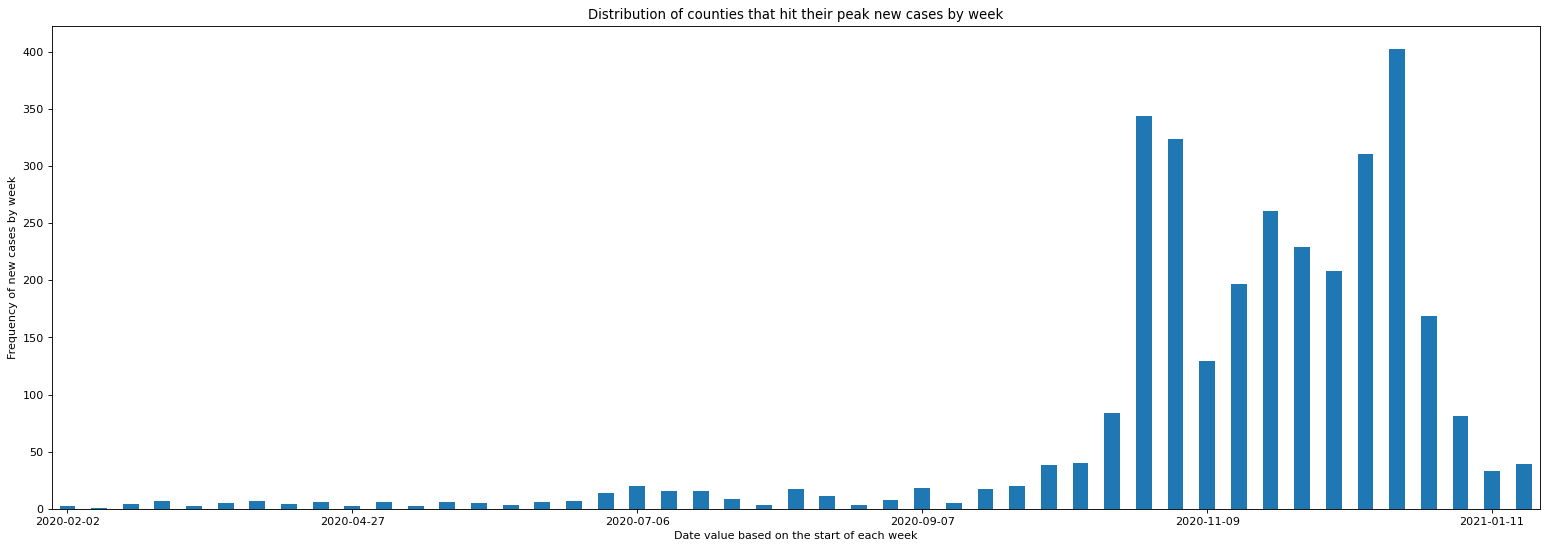

In [10]:
# 8.) Find the week that each county achieved their highest rate of new covid cases per 100,000 population. If a county reach the peak multiple ties pick the earliest one. Plot via a bar chart the number of countries that reached their peak each week.

# Here we can use the dataframe func we created for question 5
total_case_count = pd.DataFrame(convert_to_week(new_covid_cases_by_county)).T
total_case_count = total_case_count.reset_index()
total_case_count_dates = total_case_count.loc[:, '2020-01-27':]
total_case_count_dates = (total_case_count_dates * 100000).div(total_case_count.population, axis=0)
total_case_count.loc[:, '2020-01-27':] = total_case_count_dates

# Using idxmax will allow us to get the first occurance of the maximum value and avoid any duplicates for each row. 
total_case_count['Week'] = total_case_count.loc[:, '2020-01-27':].astype(float).idxmax(axis=1)
final_output = total_case_count['Week'].value_counts().sort_index()
figure(num=None, figsize=(24, 8), dpi=80, facecolor='w', edgecolor='k')

final_output.plot.bar()
plt.xticks(np.arange(0, 49, step=9), ['2020-02-02', '2020-04-27', '2020-07-06', '2020-09-07', '2020-11-09', '2021-01-11'])
plt.xticks(rotation=0)
plt.xlabel('Date value based on the start of each week');
plt.ylabel('Frequency of new cases by week');
plt.title('Distribution of counties that hit their peak new cases by week')
plt.show()

What does the plot indicate about the pandemic?

The chart produced below is consistent with the uptick we observed in the previous graphs leading into the holidays. 
Across the distribution of counties, most of them experienced their highest weekly increase between the end of October and the middle of January. This is consistent with the major holidays (Halloween, Thanksgiving, Christmas, etc.). 
Another interesting point is the uptick following the Fourth of July. This is observed across all 4 states in the previous data and it is clear that holidays are directly correlated with increases of new cases.

You can see that prior to the 4th, the distribution of values is very close to zero. Following Halloween, the lowest value observed is very close to 40 and the highest value observed is just over 400. 

Lastly, the graph follows a left-skewed normal distribution that has three means. The middle mean, which is between November 2020 and January 2021, is the smallest of the three but all of the means are observed during the same time period that we have previously noted as the Holidays. Again, it is clear from the data above that the peak of the covid case distribution is represented in these few months. 

In [11]:
# 9.) Compute the total number of covid cases in each county and the number of covid deaths. Compute the percent of the population in each county that is still alive and has had covid. Show the top 20 rates.

# Variable to protect change of percentage in DF columns prior to last table output.
change_to_pct = False

total_case_count = pd.DataFrame(convert_to_week(new_covid_cases_by_county)).T
total_case_count = total_case_count.T.sum().to_frame()
total_death_count = pd.DataFrame(convert_to_week(new_covid_deaths_by_county)).T
total_death_count = total_death_count.T.sum().to_frame()

df_heard_immunity = pd.merge(total_case_count, total_death_count, on = ['countyFIPS', 'State_x', 'County Name_x', 'population'])
df_heard_immunity.columns = ['Cases Total', 'Deaths Total']
df_heard_immunity = df_heard_immunity.reset_index()
df_heard_immunity["Still Alive"]  = (df_heard_immunity['Cases Total'] - df_heard_immunity['Deaths Total'])
df_heard_immunity['Herd Immunity percentage'] = (((df_heard_immunity['Still Alive']) / df_heard_immunity['population']))

# DataFrame that represents the top 20 counties by cases
df_heard_immunity_cases = df_heard_immunity.sort_values(by=['Cases Total'], ascending=False)
df_heard_immunity_cases = df_heard_immunity_cases.rename(columns={'State_x' : 'State', 'County Name_x': 'County Name'})
df_heard_immunity_cases = df_heard_immunity_cases[df_heard_immunity_cases['County Name'] != 'Statewide Unallocated']
df_heard_immunity_cases = df_heard_immunity_cases.drop(['countyFIPS', 'Deaths Total', 'Still Alive', 'Herd Immunity percentage'], axis=1)
df_heard_immunity_cases['Cases Total'] = df_heard_immunity_cases['Cases Total'].astype(str)
df_heard_immunity_cases = df_heard_immunity_cases.head(20).reset_index()
df_heard_immunity_cases.index += 1
df_cases = df_heard_immunity_cases[['State', 'County Name', 'population', 'Cases Total']]

# DataFrame that represents the top 20 counties by deaths
df_heard_immunity_deaths = df_heard_immunity.sort_values(by=['Deaths Total'], ascending=False)
df_heard_immunity_deaths = df_heard_immunity_deaths.rename(columns={'State_x' : 'State', 'County Name_x': 'County Name'})
df_heard_immunity_deaths = df_heard_immunity_deaths[df_heard_immunity_deaths['County Name'] != 'Statewide Unallocated']
df_heard_immunity_deaths = df_heard_immunity_deaths.drop(['countyFIPS', 'Cases Total', 'Still Alive', 'Herd Immunity percentage'], axis=1)
df_heard_immunity_deaths['Deaths Total'] = df_heard_immunity_deaths['Deaths Total'].astype(str)
df_heard_immunity_deaths = df_heard_immunity_deaths.head(20).reset_index()
df_heard_immunity_deaths.index += 1
df_deaths = df_heard_immunity_deaths[['State', 'County Name', 'population', 'Deaths Total']]

# DataFrame that represents the top 20 counties by herd immunity percentage 
df_heard_immunity_final = df_heard_immunity.sort_values(by=['Herd Immunity percentage'], ascending=False)
df_heard_immunity_final = df_heard_immunity_final.rename(columns={'State_x' : 'State', 'County Name_x': 'County Name'})
df_heard_immunity_final = df_heard_immunity_final[df_heard_immunity_final['County Name'] != 'Statewide Unallocated']
df_heard_immunity_final = df_heard_immunity_final.drop(['countyFIPS', 'Cases Total', 'Deaths Total', 'Still Alive'], axis=1)
df_heard_immunity_final = df_heard_immunity_final.head(20).reset_index()
df_heard_immunity_final.index += 1
df_final = df_heard_immunity_final[['State', 'County Name', 'population', 'Herd Immunity percentage']]

print('Top 20 counties by cases given no population per 100,000 constraint')
display(df_cases)
print('')
print('Top 20 counties by deaths given no population per 100,000 constraint')
display(df_deaths)
print('')
change_to_pct = True
if change_to_pct:
    pd.options.display.float_format = '{:.2%}'.format
    print('Top 20 counties for percentage of the population that is approaching herd immunity')
    display(df_final)
    pd.reset_option('^display.', silent=True)

Top 20 counties by cases given no population per 100,000 constraint


,State,County Name,population,Cases Total
1,CA,Los Angeles County,10039107,1114717.0
2,AZ,Maricopa County,4485414,487041.0
3,IL,Cook County,5150233,460552.0
4,FL,Miami-Dade County,2716940,383601.0
5,TX,Harris County,4713325,327079.0
6,CA,San Bernardino County,2180085,273718.0
7,CA,Riverside County,2470546,271741.0
8,TX,Dallas County,2635516,266335.0
9,CA,San Diego County,3338330,245331.0
10,CA,Orange County,3175692,237390.0



Top 20 counties by deaths given no population per 100,000 constraint


,State,County Name,population,Deaths Total
1,CA,Los Angeles County,10039107,17955.0
2,IL,Cook County,5150233,9006.0
3,NY,Kings County,2559903,8569.0
4,NY,Queens County,2253858,8397.0
5,AZ,Maricopa County,4485414,7971.0
6,NY,Bronx County,1418207,5522.0
7,FL,Miami-Dade County,2716940,5011.0
8,TX,Harris County,4713325,4506.0
9,MI,Wayne County,1749343,4041.0
10,NY,New York County,1628706,3665.0



Top 20 counties for percentage of the population that is approaching herd immunity


,State,County Name,population,Herd Immunity percentage
1,CO,Crowley County,6061,30.87%
2,CO,Bent County,5577,23.47%
3,AR,Lincoln County,13024,23.40%
4,TN,Lake County,7016,23.29%
5,SD,Dewey County,5892,23.23%
6,GA,Chattahoochee County,10907,22.77%
7,KS,Norton County,5361,21.94%
8,SD,Bon Homme County,6901,21.37%
9,SD,Buffalo County,1962,20.74%
10,TN,Trousdale County,11284,20.63%


Is any county getting close to herd immunity, that is 70% or more people immune?

Based on the data output above, not a single county in the US is close to achieving the 70% rate required for herd immunity. 
Of the top 20 counties, there is only one county that is barely above a population of 20,000. The low population is likely the reason that these values are so high compared to the larger counties in the United States. 
The distribution of these values is also more spread out than question 5 and 6. The most common states in this dataset are Arkansas and South Dakota but they each only appear three times in the top twenty list. One interesting note is that FL is the only state that appears in all 3 tables. Lastly, the majority of the top 20 values fall with a percentage range of 18% to 24%. This may show that there is a calculation bias due to the small population size in the denominator. 

<AxesSubplot:ylabel='Values'>

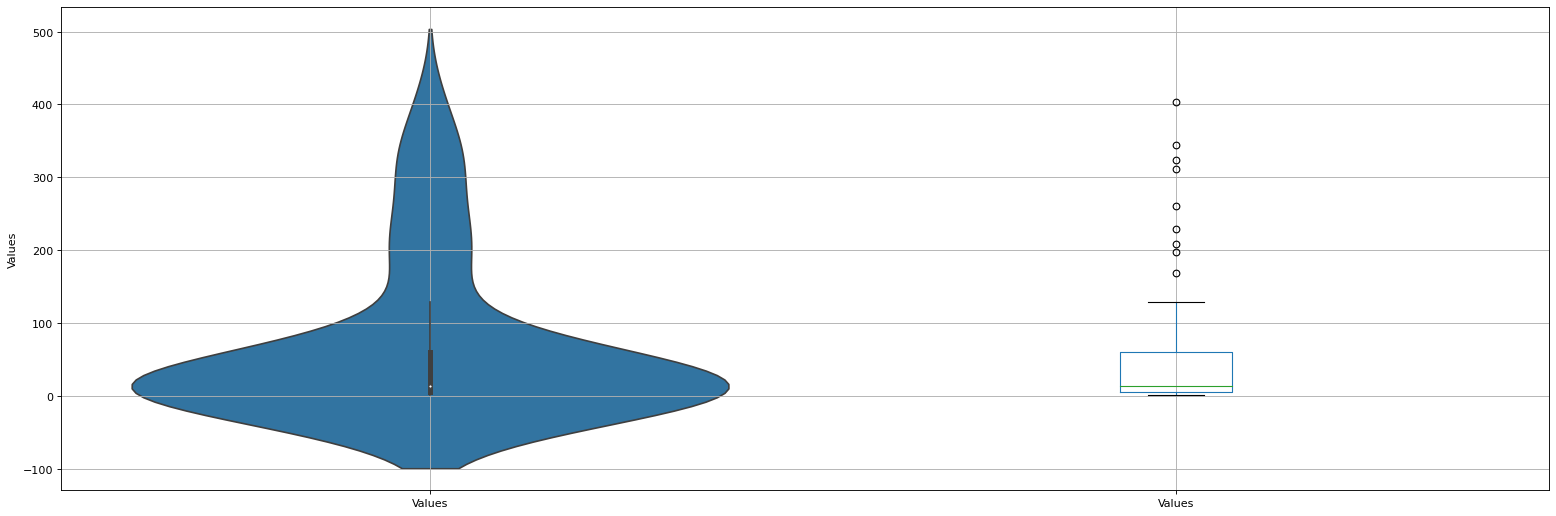

In [12]:
# 10.) Produce a Violin and box plots of all the values computed in #8. 

new_dict = OrderedDict(sorted(final_output.items(), key = lambda x: parse(x[0])))
dist_df = pd.DataFrame(list(new_dict.items()),columns = ['Dates','Values'])

fig, ax = plt.subplots(figsize =(24, 8), dpi=80) 
sns.violinplot( ax = ax, y = dist_df['Values'] ) 
dist_df.boxplot(return_type='axes')

What do the plots show about the pandemic in the USA?

For the violin plot, the wider portions indicate higher probability of data to fall within the interval range. As the plot becomes skinner, the probability decreases. The small white dot indicates the median and the black area surrounding this dot indicates the interquartile range. 

Based on the violin plot above, you can clearly see that the majority of weeks do not have many new counties reaching their records of new cases and new deaths. 
Since the median is ~14, you can say that half of weeks observed will have less than 14 counties reporting their highest cases. The tip of the graph shows a small number of weeks that are between the range of 100 to 400. You can see by the sharpness of the upper plot that this does not have a high probability. 

This violin plot is unimodal because there is only one section of the plot where the majority of distribution is.  

The box plot is positively correlated because the median is close to the lower quartile and there are many points above the third quartile. The boxplot does not give a good representation of the distribution data like the violin plot does. However, it does a good job of indicating the high values as outliers. The benefit of boxplots with regard to outliers is that we can see how many outliers are in a distribution. Here we observe there are 9 outliers. We can also see that the highest rate of counties was just above 400. You can also see that the median and quartile ranges line up exactly with the points in the violin plot. Having these graphs on the same scale helps with understanding the unique visualization tools of each graph. Another key point of the boxplot is you can see that about half of the cases fall in between the range of 0 and 80. This is indicated by the first and third quartiles. This is because each quartile represents 25% of the data so 25% to 75% of the range of values fall within this range.